<a href="https://colab.research.google.com/github/erickvaldezsallagos/EDPII/blob/main/minimoscuadrados58.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ERICK VALDEZ SALLAGOS**\
**MINIMOS CUADRADOS**\
EJERCICIO 5.8\
$u''+u=x$\
con condiciones iniciales:\
$u(0)=0$ y $u'(0)=2$\
Encontrar una solucion aproximada de la forma:\
$u_N=α_0+α_1 x+α_2 x^2+α_3 x^3+...$


In [11]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

Definimos simbolos y funcion de prueba

In [12]:
x, a, b = sp.symbols('x a b')
u_N = 2*x + a*x**2 + b*x**3  # Condiciones: u(0)=0 → α₀=0, u'(0)=2 → α₁=2

Residuo

In [13]:
#  E(x) = u_N'' + u_N - x
epsilon = sp.simplify(sp.diff(u_N, x, 2) + u_N - x)

**METODO DE MINIMOS CUADRADOS**

In [14]:
I = sp.integrate(epsilon**2, (x, 0, 1))
dI_da = sp.diff(I, a)
dI_db = sp.diff(I, b)

In [15]:
sol = sp.solve([dI_da, dI_db], [a, b])
u_N_mc = sp.simplify(u_N.subs({a: sol[a], b: sol[b]}))


**SOLUCION EXACTA**

In [ ]:
u_exacta = sp.sin(x) + x

CALCULO DEL ERROR

In [16]:
print("="*60)
print("EJERCICIO 5.8 - MÉTODO DE MÍNIMOS CUADRADOS")
print("="*60)
print(f"\nSolución exacta: u(x) = {u_exacta}")
print(f"Aproximación: u_N(x) = {u_N_mc}")
print(f"Error RMS en [0,1]: {error_RMS.evalf():.8f}")

EJERCICIO 5.8 - MÉTODO DE MÍNIMOS CUADRADOS

Solución exacta: u(x) = x + sin(x)
Aproximación: u_N(x) = x*(-24759*x**2 - 2670*x + 347156)/173578
Error RMS en [0,1]: 0.00068316


COMPARACION EN PUNTOS

In [17]:
print("\nComparación en puntos:")
print("-"*50)
print(f"{'x':<6} {'Exacta':<12} {'Aprox.':<12} {'Error':<12}")
print("-"*50)

for xi in [0, 0.25, 0.5, 0.75, 1.0]:
    exact = float(u_exacta.subs(x, xi).evalf())
    aprox = float(u_N_mc.subs(x, xi).evalf())
    error = float(abs(aprox - exact))
    print(f"{xi:<6} {exact:<12.6f} {aprox:<12.6f} {error:<12.6f}")


Comparación en puntos:
--------------------------------------------------
x      Exacta       Aprox.       Error       
--------------------------------------------------
0      0.000000     0.000000     0.000000    
0.25   0.497404     0.496810     0.000594    
0.5    0.979426     0.978325     0.001101    
0.75   1.431639     1.431172     0.000467    
1.0    1.841471     1.841979     0.000508    


**GRAFICA SOLUCION EXACTA VS MINIMOS CUADRADOS**

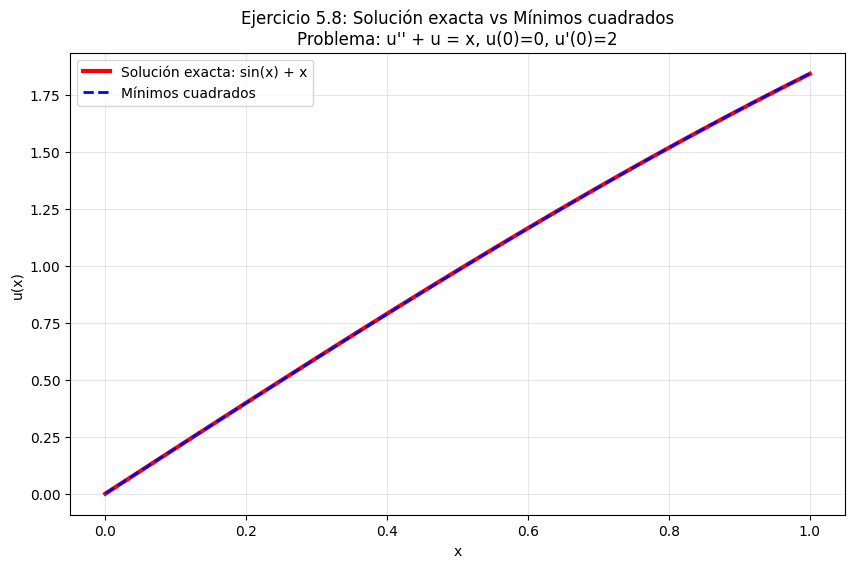

In [18]:
u_exacta_func = sp.lambdify(x, u_exacta, 'numpy')
u_mc_func = sp.lambdify(x, u_N_mc, 'numpy')

xx = np.linspace(0, 1, 100)
yy_exacta = u_exacta_func(xx)
yy_mc = u_mc_func(xx)

plt.figure(figsize=(10, 6))
plt.plot(xx, yy_exacta, 'r-', linewidth=3, label='Solución exacta: sin(x) + x')
plt.plot(xx, yy_mc, 'b--', linewidth=2, label='Mínimos cuadrados')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.title("Ejercicio 5.8: Solución exacta vs Mínimos cuadrados\nProblema: u'' + u = x, u(0)=0, u'(0)=2")
plt.legend()
plt.grid(True, alpha=0.3)

PUNTOS DE COMPARACION

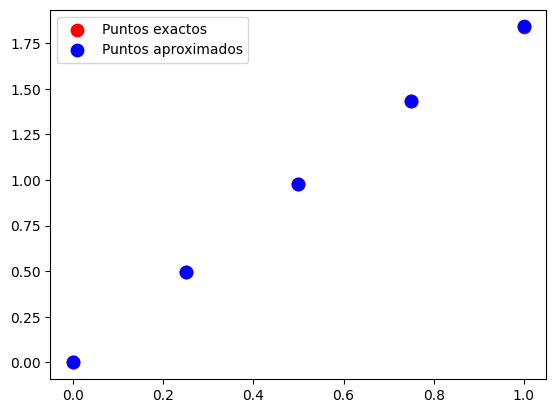

In [19]:
puntos_x = [0, 0.25, 0.5, 0.75, 1.0]
puntos_exacta = [u_exacta.subs(x, xi).evalf() for xi in puntos_x]
puntos_mc = [u_N_mc.subs(x, xi).evalf() for xi in puntos_x]
plt.scatter(puntos_x, puntos_exacta, color='red', s=80, zorder=5, label='Puntos exactos')
plt.scatter(puntos_x, puntos_mc, color='blue', s=80, zorder=5, label='Puntos aproximados')

plt.legend(loc='best')
plt.show()

**COMPARACION CON EL METODO DE COLOCACION**

In [ ]:
# COLOCACIÓN (puntos x=0.5 y x=1)
sol_col = sp.solve([epsilon.subs(x, 0.5), epsilon.subs(x, 1)], [a, b])
u_N_col = sp.simplify(u_N.subs({a: sol_col[a], b: sol_col[b]}))


ERROR

In [22]:
sol_col = sp.solve([epsilon.subs(x, 0.5), epsilon.subs(x, 1)], [a, b])
u_N_col = sp.simplify(u_N.subs({a: sol_col[a], b: sol_col[b]}))

error_mc = sp.sqrt(sp.integrate((u_N_mc - u_exacta)**2, (x, 0, 1)))
error_col = sp.sqrt(sp.integrate((u_N_col - u_exacta)**2, (x, 0, 1)))

RESULTADOS

In [23]:
print("COMPARACIÓN: MÍNIMOS CUADRADOS vs COLOCACIÓN")
print(f"\nMínimos cuadrados: u(x) = {u_N_mc}")
print(f"Error RMS: {error_mc.evalf():.6f}")
print(f"\nColocación (x=0.5, x=1): u(x) = {u_N_col}")
print(f"Error RMS: {error_col.evalf():.6f}")
print(f"\nExacta: u(x) = {u_exacta}")

COMPARACIÓN: MÍNIMOS CUADRADOS vs COLOCACIÓN

Mínimos cuadrados: u(x) = x*(-24759*x**2 - 2670*x + 347156)/173578
Error RMS: 0.000683

Colocación (x=0.5, x=1): u(x) = x*(-0.117647058823529*x**2 - 0.0588235294117647*x + 2)
Error RMS: 0.010556

Exacta: u(x) = x + sin(x)


**GRAFICA**

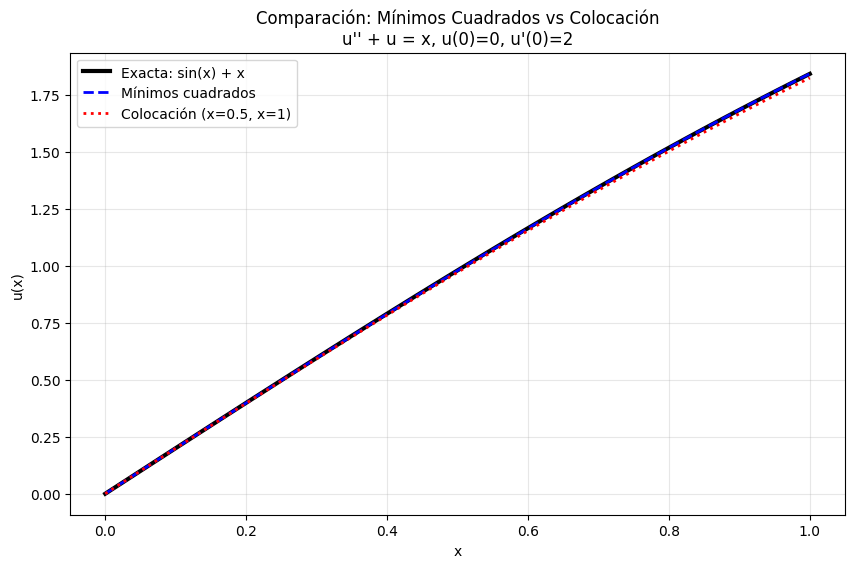

In [24]:
xx = np.linspace(0, 1, 100)
u_exacta_func = sp.lambdify(x, u_exacta, 'numpy')
u_mc_func = sp.lambdify(x, u_N_mc, 'numpy')
u_col_func = sp.lambdify(x, u_N_col, 'numpy')

plt.figure(figsize=(10, 6))
plt.plot(xx, u_exacta_func(xx), 'k-', linewidth=3, label='Exacta: sin(x) + x')
plt.plot(xx, u_mc_func(xx), 'b--', linewidth=2, label='Mínimos cuadrados')
plt.plot(xx, u_col_func(xx), 'r:', linewidth=2, label='Colocación (x=0.5, x=1)')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.title('Comparación: Mínimos Cuadrados vs Colocación\nu\'\' + u = x, u(0)=0, u\'(0)=2')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()